In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
cocaine = pd.read_csv("dream_market_cocaine_listings.csv")
cocaine.head(5)

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL → EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
1,11,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL → EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
2,14,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL → EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
3,20,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR → EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False
4,41,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL → WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,...,False,False,False,False,False,False,False,False,False,False


In [6]:
cocaine.isna().sum()

Unnamed: 0       0
product_title    0
ships_from_to    0
grams            0
quality          0
                ..
ships_from_CN    0
ships_to_PL      0
ships_from_PL    0
ships_to_GR      0
ships_from_GR    0
Length: 64, dtype: int64

In [22]:
cocaine=cocaine.drop(['product_link'], axis=1)

In [23]:
cocaine=cocaine.drop(['vendor_link'], axis=1)

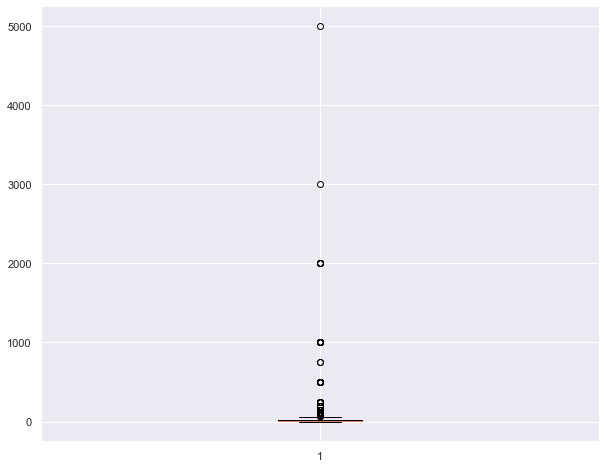

In [25]:
np.random.seed(10)
plot1 = cocaine['grams']
 
fig = plt.figure(figsize =(10, 8))
 
plt.boxplot(plot1)
 
plt.show()

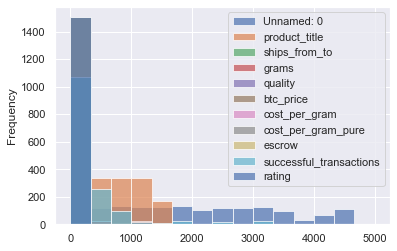

In [26]:
plot2=cocaine.plot.hist(bins=15,alpha=0.7)
plot2;

<AxesSubplot:ylabel='cost_per_gram'>

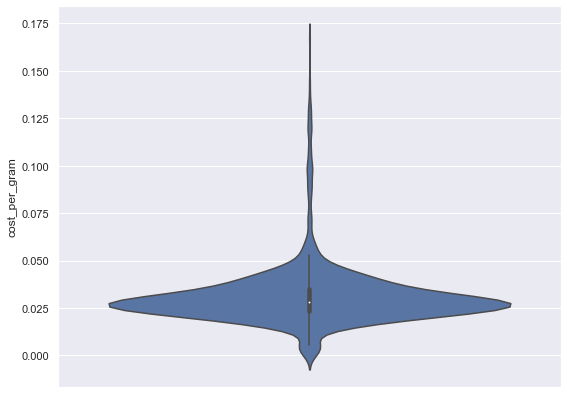

In [27]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = cocaine["cost_per_gram"] )

<AxesSubplot:ylabel='grams'>

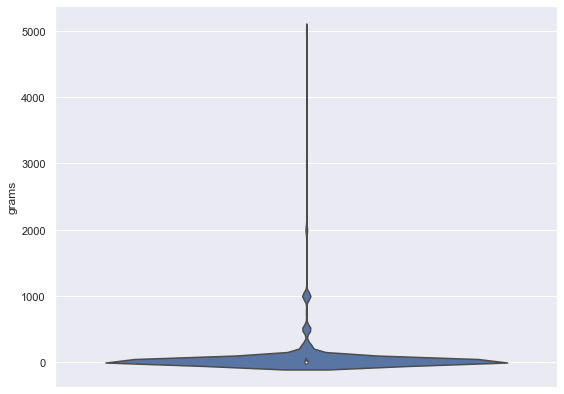

In [28]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = cocaine["grams"] )

In [29]:
cocaine[['product_title']]=cocaine[['product_title']].apply(lambda col:pd.Categorical(col).codes)

In [30]:
cocaine[['ships_from_to']]=cocaine[['ships_from_to']].apply(lambda col:pd.Categorical(col).codes)

In [32]:
cocaine[['ships_from']]=cocaine[['ships_from']].apply(lambda col:pd.Categorical(col).codes)

In [33]:
cocaine[['ships_to']]=cocaine[['ships_to']].apply(lambda col:pd.Categorical(col).codes)

In [34]:
cocaine[['ships_to_US']]=cocaine[['ships_to_US']].apply(lambda col:pd.Categorical(col).codes)

In [35]:
cocaine[['ships_from_US']]=cocaine[['ships_from_US']].apply(lambda col:pd.Categorical(col).codes)

In [36]:
cocaine[['ships_to_NL']]=cocaine[['ships_to_NL']].apply(lambda col:pd.Categorical(col).codes)

In [37]:
cocaine[['ships_from_NL']]=cocaine[['ships_from_NL']].apply(lambda col:pd.Categorical(col).codes)

In [38]:
cocaine[['ships_to_FR']]=cocaine[['ships_to_FR']].apply(lambda col:pd.Categorical(col).codes)

In [39]:
cocaine[['ships_from_FR']]=cocaine[['ships_from_FR']].apply(lambda col:pd.Categorical(col).codes)

In [41]:
cocaine[['ships_to_GB']]=cocaine[['ships_to_GB']].apply(lambda col:pd.Categorical(col).codes)

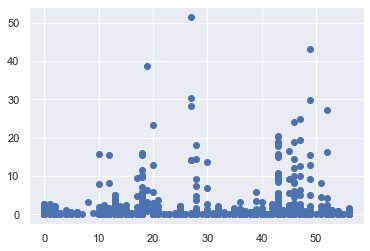

In [43]:
a=cocaine['ships_from_to']
b=cocaine['btc_price']
plt.scatter(a,b);

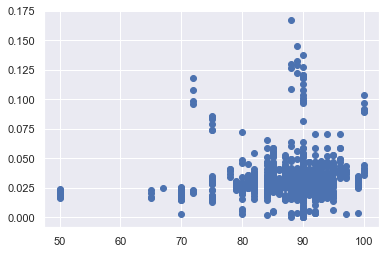

In [45]:
a=cocaine['quality']
b=cocaine['cost_per_gram']
plt.scatter(a,b);

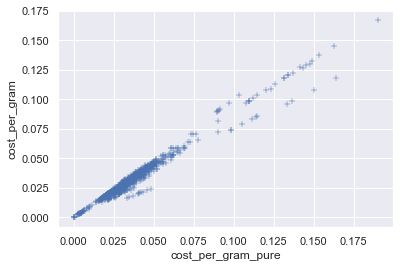

In [59]:
sns.scatterplot(x='cost_per_gram_pure', y='cost_per_gram', data= cocaine, marker = '+');

<AxesSubplot:>

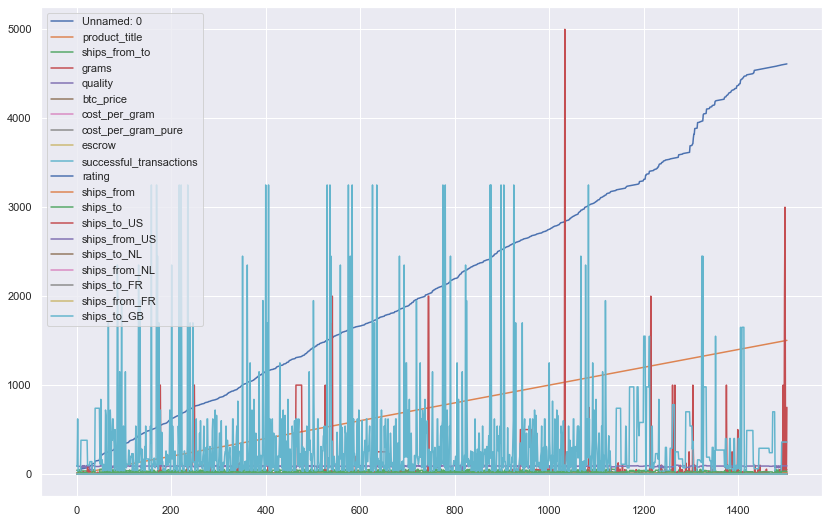

In [49]:
cocaine.plot(figsize=(14,9))

In [42]:
cocaine.head(5)

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,10,0,43,1.0,90.0,0.02577,0.02577,0.028633,1,Mister-Molly,...,False,False,False,False,False,False,False,False,False,False
1,11,1,43,2.0,90.0,0.05150,0.02575,0.028611,1,Mister-Molly,...,False,False,False,False,False,False,False,False,False,False
2,14,2,43,0.5,89.0,0.01649,0.03298,0.037056,1,0ldamsterdamm,...,False,False,False,False,False,False,False,False,False,False
3,20,3,29,1.0,89.0,0.04120,0.04120,0.046292,1,lhomme-masquer,...,False,False,False,False,False,False,False,False,False,False
4,41,4,46,1.0,87.0,0.03400,0.03400,0.039080,1,SMOOTHCRIMINAL007,...,False,False,False,False,False,False,False,False,False,False


In [7]:
cocaine.columns

Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

<AxesSubplot:>

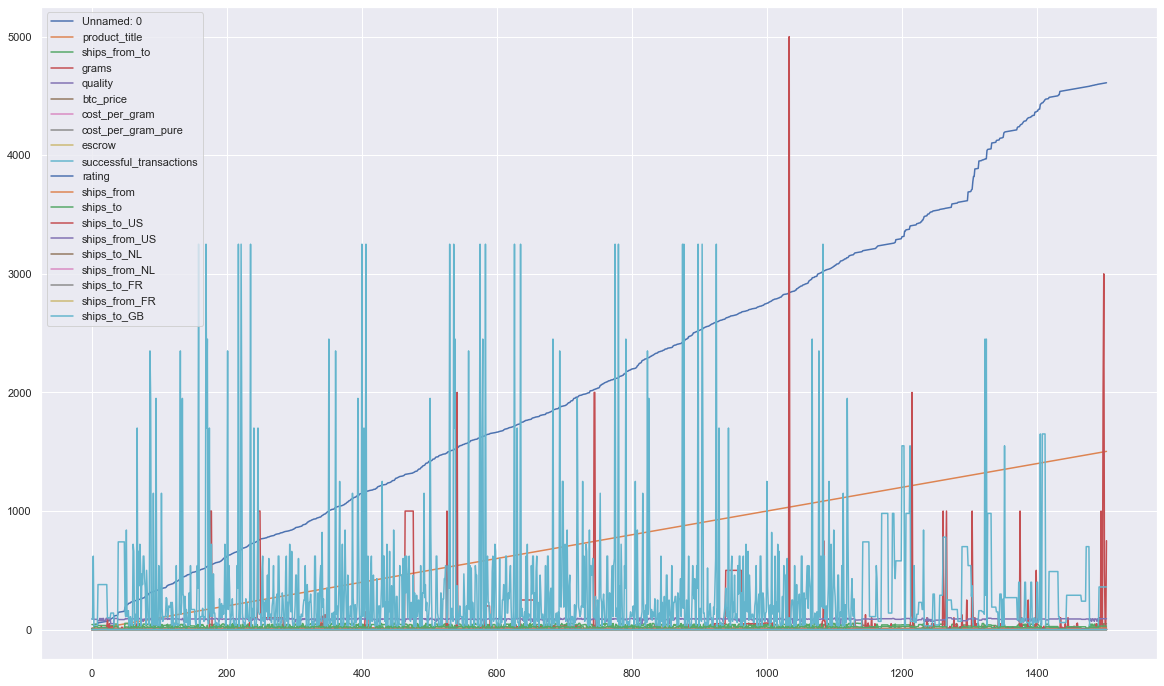

In [60]:
cocaine.plot(figsize=(20,12))

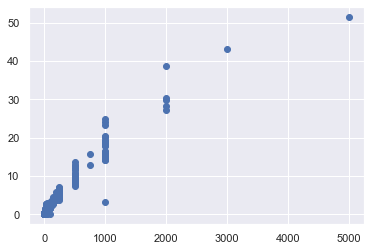

In [62]:
a=cocaine['grams']
b=cocaine['btc_price']
plt.scatter(a,b);

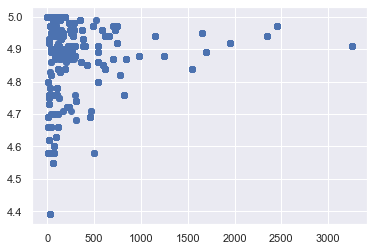

In [64]:
a=cocaine['successful_transactions']
b=cocaine['rating']
plt.scatter(a,b);

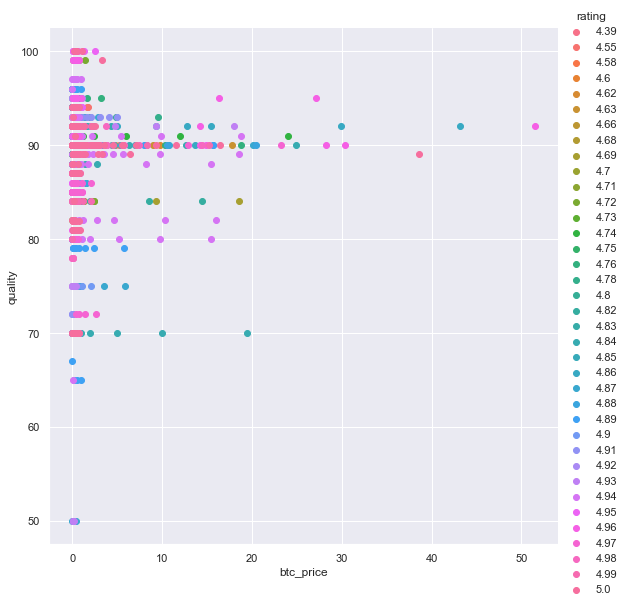

In [66]:
sns.FacetGrid(cocaine,hue="rating",size=8) \
.map(plt.scatter,"btc_price","quality") \
.add_legend()
plt.show()  

## Heatmap

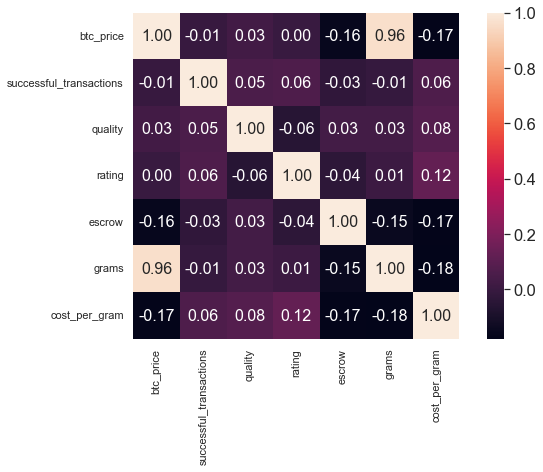

In [67]:
cols = ['btc_price','successful_transactions','quality','rating','escrow','grams',
        'cost_per_gram']
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(cocaine[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

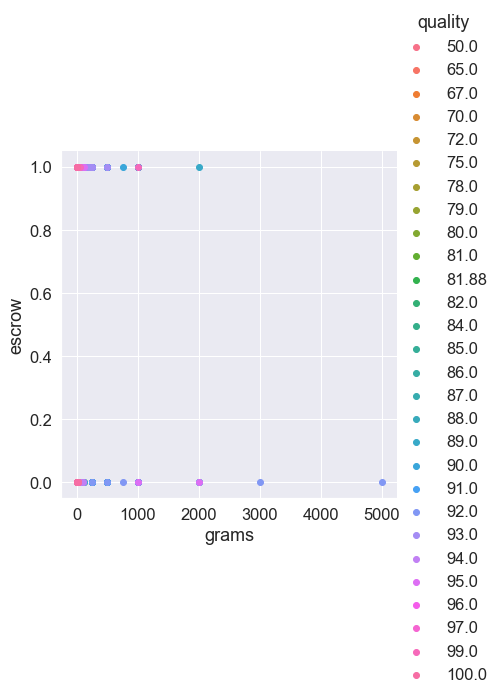

In [71]:
sns.FacetGrid(cocaine,hue="quality",size=6) \
.map(plt.scatter,"grams","escrow") \
.add_legend()
plt.show()  

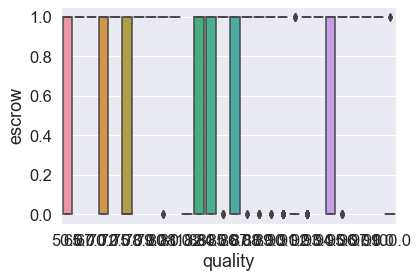

In [72]:
sns.boxplot(x="quality", y="escrow", data=cocaine);

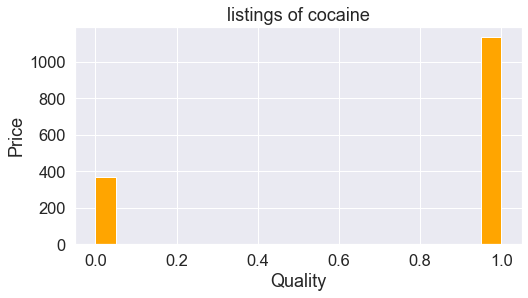

In [76]:
plt.figure(figsize = (8,4)) 
x = cocaine["escrow"] 
plt.hist(x, bins = 20, color = "orange")
plt.title("listings of cocaine") 
plt.xlabel("Quality") 
plt.ylabel("Price");

## EDA

In [77]:
cocaine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1504 non-null   int64  
 1   product_title            1504 non-null   int16  
 2   ships_from_to            1504 non-null   int8   
 3   grams                    1504 non-null   float64
 4   quality                  1504 non-null   float64
 5   btc_price                1504 non-null   float64
 6   cost_per_gram            1504 non-null   float64
 7   cost_per_gram_pure       1504 non-null   float64
 8   escrow                   1504 non-null   int64  
 9   vendor_name              1504 non-null   object 
 10  successful_transactions  1504 non-null   int64  
 11  rating                   1504 non-null   float64
 12  ships_from               1504 non-null   int8   
 13  ships_to                 1504 non-null   int8   
 14  ships_to_US             

In [89]:
cocaine = cocaine.apply(lambda x: pd.factorize(x)[0])
cocaine

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,vendor_name,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,2,1,2,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,1,3,3,3,0,2,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,0,2,4,4,4,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,1499,1499,36,62,8,813,712,1082,1,179,...,0,0,0,0,0,0,0,0,0,0
1500,1500,1500,36,43,8,571,276,705,1,179,...,0,0,0,0,0,0,0,0,0,0
1501,1501,1501,36,12,8,555,159,698,1,179,...,0,0,0,0,0,0,0,0,0,0
1502,1502,1502,36,5,8,341,369,685,1,179,...,0,0,0,0,0,0,0,0,0,0


## Test and Train

In [90]:
x=cocaine.drop('escrow',axis=1)
y = cocaine[['escrow']]

In [91]:
x.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,vendor_name,successful_transactions,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,2,1,2,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,1,3,3,3,2,2,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,0,2,4,4,4,3,3,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y.head()

,escrow
0,0
1,0
2,0
3,0
4,0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [95]:
x_train.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,vendor_name,successful_transactions,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
1027,1027,1027,0,5,18,543,83,116,95,53,...,0,0,0,0,0,0,0,0,0,0
621,621,621,9,35,0,378,343,468,104,37,...,0,0,0,0,0,0,0,0,0,0
1372,1372,1372,3,2,7,680,611,1003,168,12,...,0,0,0,0,0,0,0,0,0,0
195,195,195,16,5,0,123,130,162,20,17,...,0,0,0,0,0,0,0,0,0,0
1244,1244,1244,26,12,11,438,615,914,148,14,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y_train.head()

,escrow
1027,0
621,1
1372,0
195,0
1244,0


## Random Forest Classifier 

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
RandomForest = RandomForestClassifier()

In [110]:
RandomForest.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
y_pred = RandomForest.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9195171026156942

In [113]:
confusion_matrix(y_test, y_pred)

array([[362,  14],
       [ 26,  95]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       376
           1       0.87      0.79      0.83       121

    accuracy                           0.92       497
   macro avg       0.90      0.87      0.89       497
weighted avg       0.92      0.92      0.92       497



#  Decision Tree 

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [119]:
dtc = DecisionTreeClassifier() 

In [121]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [123]:
y_pred = dtc.predict(x_test)

In [124]:
confusion_matrix(y_test, y_pred)

array([[351,  25],
       [ 30,  91]], dtype=int64)

In [125]:
accuracy_score(y_test, y_pred)

0.8893360160965795

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       376
           1       0.78      0.75      0.77       121

    accuracy                           0.89       497
   macro avg       0.85      0.84      0.85       497
weighted avg       0.89      0.89      0.89       497



In [128]:
from sklearn import tree

[Text(264.72878289473687, 213.41333333333333, 'X[26] <= 0.5\ngini = 0.371\nsamples = 1007\nvalue = [759, 248]'),
 Text(202.48914473684212, 205.36, 'X[18] <= 0.5\ngini = 0.354\nsamples = 982\nvalue = [756, 226]'),
 Text(113.25197368421053, 197.30666666666667, 'X[10] <= 8.5\ngini = 0.331\nsamples = 933\nvalue = [738, 195]'),
 Text(45.39868421052632, 189.25333333333333, 'X[34] <= 0.5\ngini = 0.224\nsamples = 396\nvalue = [345, 51]'),
 Text(41.482894736842105, 181.2, 'X[27] <= 0.5\ngini = 0.208\nsamples = 391\nvalue = [345, 46]'),
 Text(28.38947368421053, 173.14666666666668, 'X[1] <= 30.5\ngini = 0.014\nsamples = 142\nvalue = [141, 1]'),
 Text(24.47368421052632, 165.09333333333333, 'X[2] <= 4.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(20.557894736842105, 157.04, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(28.38947368421053, 157.04, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(32.305263157894736, 165.09333333333333, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text

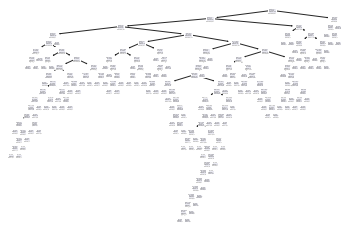

In [129]:
tree.plot_tree(dtc)

# Logistic Regression

In [130]:
lrc = LogisticRegression(random_state = 0)

In [132]:
lrc.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [134]:
y_pred = lrc.predict(x_test)

In [135]:
confusion_matrix(y_test, y_pred)

array([[373,   3],
       [121,   0]], dtype=int64)

In [136]:
accuracy_score(y_test, y_pred)

0.7505030181086519

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       376
           1       0.00      0.00      0.00       121

    accuracy                           0.75       497
   macro avg       0.38      0.50      0.43       497
weighted avg       0.57      0.75      0.65       497



# Naive Bayes

In [140]:
from sklearn.naive_bayes import BernoulliNB

In [141]:
naive_bayes = BernoulliNB()

In [143]:
naive_bayes.fit(x_test,y_test)

BernoulliNB()

In [145]:
naive_train_bayes = naive_bayes.score(x_train,y_train)
naive_train_bayes

0.785501489572989

In [147]:
naive_bayes = naive_bayes.predict(x_test)
accuracy_score(y_test,naive_bayes)

0.7826961770623743

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       376
           1       0.00      0.00      0.00       121

    accuracy                           0.75       497
   macro avg       0.38      0.50      0.43       497
weighted avg       0.57      0.75      0.65       497

